# Numerical Computing with NumPy

## Introductory example

Python built-in collections like `list` offer a flexible way of storing and maniupulating data. As dicussed previously, collections usually just store references to objects. While this is every convenient when writing code, it comes with costs in performance in memory. 

Let's look at an example. Say we took one million measurements in an experiment and now want to compute the mean of it. We could do it in the following manner. 

In [84]:
import random 
measurements = [random.randint(150, 200) for _ in range(1_000_000)]

def calculate_mean(measurements):
    accumulator = 0
    for measurement in measurements:
        accumulator += measurement
    
    mean = accumulator / len(measurements)
    return mean

%timeit calculate_mean(measurements)

78.2 ms ± 3.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


This is rather slow since Python has to rebind a new variable in every loop and then has to check whether the `+` operation is supported between the `accumulator` and the current `measurement`. This prevents it from trying to add together objects that can't be added, but in this case we are pretty sure that we are only dealing with integers. If we could tell the interpreter that we are only adding integers, we could skip all that typechecking and speed up the operation. For this purpose, `numpy` was invented.  


To use numpy we have to import it. The import is usuall aliased as `np` so we have to type less later on. Aliasing things is only recommended if it is well established in the community of the respective package.

In [85]:
import numpy as np

Numpy's standard datatype is the `ndarray` (which stands for n-dimensional array). In the simplest case, numpy array can be created from list.

In [86]:
measurements_array = np.array(measurements)
measurements_array

array([188, 159, 177, ..., 196, 153, 152])

In [87]:
type(measurements_array)

numpy.ndarray

They behave very similar to list, but have a fixed datatype underneath. Numpy automatically notices that all our values are intergers and chooses the appropriate datatype. An integer that takes up 64 bits of memory.

In [88]:
measurements_array.dtype

dtype('int64')

Moreover, numpy offers a lot of routines for mathematical operations of arrays. Let's see if we acually gained something by using numpy.

In [89]:
%timeit np.mean(measurements_array)

2.64 ms ± 9.34 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Almost 100x speedup in comparision to the pure Python implementation! After convincing ourselfs that NumPy is useful, we have a more in depth look at the numpy array.

## Anatomy of arrays
Every array has a bunch of attributes that yield inforation about what it is.

### dtype

`.dtype` gives information about the data type. arrays can contain bools, ints, unsigned ints, floats or complex numbers of various byte sizes. They can also store strings or Python objects, but that has very few use cases.

In [90]:
values = [0, 1, 2, 3, 4]
int_arr = np.array(values, dtype='int')
int_arr, int_arr.dtype

(array([0, 1, 2, 3, 4]), dtype('int64'))

If the dtype does not match the given values, numpy will cast everything to that data type.

In [91]:
bool_arr = np.array(values, dtype='bool')
bool_arr, bool_arr.dtype

(array([False,  True,  True,  True,  True]), dtype('bool'))

If no explicit data type is given, numpy will choose the "smallest common denominator". In the following example, everything becomes a float, as ints can be represented as floats, but not vice versa.

In [92]:
values = [0, 1, 2.5, 3, 4]
float_arr = np.array(values)
float_arr, float_arr.dtype

(array([0. , 1. , 2.5, 3. , 4. ]), dtype('float64'))

However, once the data type is set, everything will be coerced to that type.

In [93]:
int_arr[1] = 2.5
int_arr, int_arr.dtype

(array([0, 2, 2, 3, 4]), dtype('int64'))

These non-Python data types force us to again think about problems like overflow etc.

In [94]:
values = [0, 1, 2, 3, 4]
uint_arr = np.array(values, dtype='int8')
uint_arr, uint_arr.dtype

(array([0, 1, 2, 3, 4], dtype=int8), dtype('int8'))

In [95]:
uint_arr[1] += 255
uint_arr

array([0, 0, 2, 3, 4], dtype=int8)

### shape and ndim
`.shape` is very important for keeping track of arrays with more than one dimension. It is a tuple with the number of elementns in each dimension. `.ndim` is just the number of dimensions in total. 

In [96]:
values = [0, 1, 2, 3, 4]
one_dim_arr = np.array(values)
one_dim_arr

array([0, 1, 2, 3, 4])

In [97]:
one_dim_arr.shape

(5,)

In [98]:
one_dim_arr.ndim

1

In [99]:
values = [[0, 1, 2, 3, 4]] * 3
two_dim_arr = np.array(values)
two_dim_arr

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [100]:
two_dim_arr.shape

(3, 5)

In [101]:
two_dim_arr.ndim

2

In [102]:
values = [[[0, 1, 2, 3, 4]] * 3] * 6
three_dim_arr = np.array(values)
three_dim_arr

array([[[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [103]:
three_dim_arr.shape

(6, 3, 5)

In [104]:
three_dim_arr.ndim

3

## Creating arrays
We already saw how arrays can be created from Python lists (the same works with tuples). However, we often would like to create arrays directly, without creating Python objects. This can be accomplished by several utility functions.

The equivalent of `range`.

In [105]:
np.arange(9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

Creating an array with a certain number of values in a certain interval.

In [106]:
np.linspace(start=-5, stop=5, num=10)

array([-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
        0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ])

An array containing zeros.

In [107]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

`np.zeros` takes a `shape` argument that lets us create multidimensional arrays.

In [108]:
np.zeros(shape=(2, 3, 2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

The same goes for `ones`, `empty` and `full`.

In [109]:
np.ones(shape=(2, 3, 2))

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

In [110]:
# Corresponds to whatever was left in memory. Using zeros for initialising arrays is usually saver.
np.empty(shape=(2, 3, 2))

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

In [111]:
# Corresponds to whatever was left in memory. Using zeros for initialising arrays is usually saver.
np.full(shape=(2, 3, 2), fill_value=42)

array([[[42, 42],
        [42, 42],
        [42, 42]],

       [[42, 42],
        [42, 42],
        [42, 42]]])

`np.random` contains a lot of functions to create arrays filled with random values of various probability distributions.

In [112]:
np.random.random((3, 3))

array([[0.79272864, 0.27791673, 0.6466601 ],
       [0.97302444, 0.57795441, 0.68317077],
       [0.69995326, 0.81340092, 0.99647061]])

## Mathematical operations
Numpy contains a lot of mathematical functions that operate on arrays in a vectorized manner. That means that they are applied to each element, without explicit for-loops. Vectorized functions are called `ufuncs` (universal functions) in Numpy.

### Standard arithmetic

In [113]:
arr = np.arange(9)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [114]:
arr + arr

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16])

In [115]:
arr - arr

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [116]:
arr / arr

/home/jarno/.miniconda/envs/scientific/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [117]:
arr * arr

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64])

In [118]:
arr ** 2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64])

Using `@` you can even do matrix multiplication. In the case of 1d arrays, this is the inner product between two vectors.

In [119]:
arr @ arr

204

### Some standard functions

In [120]:
np.log(arr)

/home/jarno/.miniconda/envs/scientific/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436,
       1.60943791, 1.79175947, 1.94591015, 2.07944154])

In [121]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03])

In [122]:
np.sin(arr)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825])

### Aggregations functions
Aggregation function are functions that reduce the dimensionality of an array. They provide an `axis` argument, to specify which dimension to reduce.

In [123]:
two_dim_arr = np.arange(16).reshape((4, 4))
two_dim_arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [124]:
np.min(two_dim_arr)

0

In [125]:
np.min(two_dim_arr, axis=0)

array([0, 1, 2, 3])

In [126]:
np.min(two_dim_arr, axis=1)

array([ 0,  4,  8, 12])

In [127]:
np.max(two_dim_arr)

15

In [128]:
np.max(two_dim_arr, axis=0)

array([12, 13, 14, 15])

In [129]:
np.max(two_dim_arr, axis=1)

array([ 3,  7, 11, 15])

In [130]:
np.sum(two_dim_arr)

120

In [131]:
np.sum(two_dim_arr, axis=0)

array([24, 28, 32, 36])

In [132]:
np.sum(two_dim_arr, axis=1)

array([ 6, 22, 38, 54])

Many of these function are also available as method on the array object.

In [133]:
two_dim_arr.sum()

120

### Broadcasting
What happens if you try to add arrays of different shapes? Numpy will try to expand the arrays according to three rules and try to make their shapes match, so the operation can be applied elementwise. 

**1. Rule** If the arrays have different numbers of dimensions, the smaller one is padded with ones on its left side.<br/>
            Example: (5 x 3) + (3) &rarr; (5 x 3) + (**1** x 3)<br/>
**2. Rule** If the number of the dimensions matches, but the size of a dimension does not, dimensions with the size of 1 are expanded.<br/>
            Example: (5 x 3) + (1 x 3) &rarr; (5 x 3) + (**5** x 3)<br/>
**3. Rule** If the shapes of the  arrays still defer after applying the Rule 1 and 2, a broadcasting error is raised.

The figure below gives an illustration (source https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html) ![](broadcasting.png)




The Numpy documentation gives further insights https://docs.scipy.org/doc/numpy-1.14.0/user/basics.broadcasting.html. 


In [134]:
np.arange(15).reshape((5, 3)) + np.arange(3) 

array([[ 0,  2,  4],
       [ 3,  5,  7],
       [ 6,  8, 10],
       [ 9, 11, 13],
       [12, 14, 16]])

## Advanced indexing
Numpy provides indexing methods that go beyond the indexing techniques known from standard Python sequences.


### Multidimensional indexing
Instead of doing subsequent indexing as with standard Python lists you can index all dimensions at once.

In [135]:
two_dim_list = [[ 0,  1,  2],
                [ 3,  4,  5],
                [ 6,  7,  8],
                [ 9, 10, 11],
                [12, 13, 14]]
two_dim_list[2][1]

7

In [136]:
two_dim_arr = np.array(two_dim_list)
two_dim_arr[2, 1]

7

You can use a colon to get all values from that dimensions.

In [137]:
two_dim_arr[:, 1]

array([ 1,  4,  7, 10, 13])

If you need all values from several consecutive dimensions you can use `...` as a shorthand.

In [138]:
four_dim_arr = np.stack((np.ones((3, 3, 3)), 
                         np.ones((3, 3, 3)) * 2, 
                         np.ones((3, 3, 3)) * 3, 
                         np.ones((3, 3, 3)) * 4))
four_dim_arr

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]],

        [[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]],

        [[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]]],


       [[[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.]],

        [[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.]],

        [[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.]]],


       [[[4., 4., 4.],
         [4., 4., 4.],
         [4., 4., 4.]],

        [[4., 4., 4.],
         [4., 4., 4.],
         [4., 4., 4.]],

        [[4., 4., 4.],
         [4., 4., 4.],
         [4., 4., 4.]]]])

In [139]:
four_dim_arr.shape

(4, 3, 3, 3)

In [140]:
four_dim_arr[3, :, :, :]

array([[[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]]])

In [141]:
four_dim_arr[3, ...]

array([[[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]]])

### Fancy indexing
You can pass an array containing indices, this especially useful for drawing random items from an array.

In [142]:
arr = np.arange(9) + 10
arr

array([10, 11, 12, 13, 14, 15, 16, 17, 18])

In [143]:
indices = np.array([1, 4, 5])
arr[indices]

array([11, 14, 15])

The resulting array will reflect the shape of the index array.

In [144]:
indices = np.array([[1, 4],
                    [5, 7]])
arr[indices]

array([[11, 14],
       [15, 17]])

You can index each dimension separately.

In [145]:
two_dim_arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [146]:
x_indices = np.array([3, 4])
y_indices = np.array([1, 2])
two_dim_arr[x_indices, y_indices]

array([10, 14])

### Masking
Logical arrays, i.e. arrays containing boolean values, can be used to index other arrays. These logical arrays are then called masks. This is especially useful to index based on logical conditions.

In [147]:
# A simple integer array.
arr = np.arange(1, 6)
arr

array([1, 2, 3, 4, 5])

In [148]:
# A boolean array of the same shape as arr.
mask = np.array([True, False, True, False, True])
mask

array([ True, False,  True, False,  True])

Using the mask for indexing returns an array with only elements at positions where `mask` is `True`.  

In [149]:
arr[mask]

array([1, 3, 5])

The same can be used for assignment, which keeps the shape of the original array.

In [150]:
arr[mask] = 10
arr

array([10,  2, 10,  4, 10])

Mask can be created by using logical operators. For example, to get all the entries in an array that are greater than two.


In [151]:
arr = np.arange(1, 6)
greater_two = arr > 2
greater_two


array([False, False,  True,  True,  True])

In [152]:
arr[greater_two]

array([3, 4, 5])

Or even shorter.

In [153]:
arr[arr > 2]

array([3, 4, 5])

Different masks can be combined using bitwise logical operators. These are the vectorized version of locial operators and should not be confounded with `and`, `or` and `not` with try to evaluated the truth value of a whole object.

In [154]:
smaller_or_equal_four = arr <= 4
smaller_or_equal_four   

array([ True,  True,  True,  True, False])

Bitwise and `&`.

In [155]:
arr[greater_two & smaller_or_equal_four]

array([3, 4])

Bitwise or using `|`.

In [156]:
arr[greater_two | smaller_or_equal_four]

array([1, 2, 3, 4, 5])

Bitwise xor using `^`.

In [157]:
arr[greater_two ^ smaller_or_equal_four]

array([1, 2, 5])

Bitwise negation using `~`.

In [158]:
# Gives everything smaller or equal to 2.
arr[~greater_two]

array([1, 2])

## Further Readings

NumPy chapter from Jake VanderPlas's "Python Data Science Handbook" https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html

Video tutorial from Scipy 2017


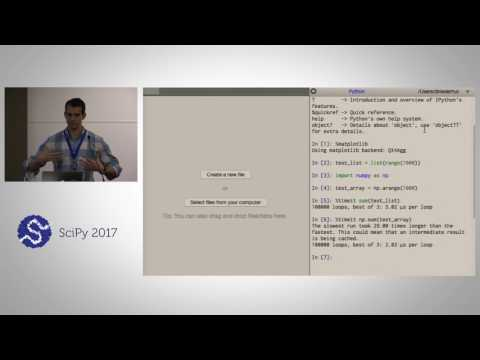

In [159]:
from IPython.display import YouTubeVideo
YouTubeVideo('lKcwuPnSHIQ')